In [5]:
# importing required packages 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
# to read the data

df = pd.read_csv('.\CreditScore_train.csv')

In [7]:
# to check the no of rows and columns

df.shape

(80000, 305)

In [8]:
df.head

<bound method NDFrame.head of           x001   x002  x003   x004   x005  x006  x007  x008  x009  x010  ...  \
0      1084094  426.0  39.0  128.0  426.0     0     0     0     0     0  ...   
1      1287777  160.0   2.0   64.0  160.0     1     1     2     0     1  ...   
2      1483016  163.0  16.0  104.0  239.0     0     0     0     1     0  ...   
3       959054    NaN   NaN    NaN  102.0     0     0     0     0     0  ...   
4      1342113    3.0   2.0    2.0   62.0     0     2     2     0     0  ...   
...        ...    ...   ...    ...    ...   ...   ...   ...   ...   ...  ...   
79995  1482075    2.0   2.0    2.0    2.0     0     1     1     0     0  ...   
79996   994459   75.0  24.0   48.0  269.0     0     0     0     0     2  ...   
79997  1168324  135.0   3.0   50.0  135.0     0     1     1     0     1  ...   
79998  1307105  132.0   1.0   41.0  366.0     0     1     2     0     1  ...   
79999   405160   94.0   3.0   27.0  109.0     0     2     2     8    11  ...   

        x

we check for null percentage , if its more than 70 per only we drop that column other columns should be filled to know both column name and value we create data frame in pandas ,do in following way:

In [9]:
# to find the null value
df.isnull().sum()

x001        0
x002    17185
x003    17185
x004    17181
x005     4867
        ...  
x301        0
x302    58471
x303        0
x304    65456
y           0
Length: 305, dtype: int64

In [10]:
# to get the index of data

a = pd.DataFrame(df.isnull().sum())
a

,0
x001,0
x002,17185
x003,17185
x004,17181
x005,4867
...,...
x301,0
x302,58471
x303,0
x304,65456


In [11]:
# to get the columns null value greater than 70%

col = []
for i, r in a.iterrows():
    if (r[0] / df.shape[0]) * 100 > 70:
        col.append(i)

In [12]:
col

['x098',
 'x155',
 'x242',
 'x255',
 'x256',
 'x257',
 'x259',
 'x295',
 'x302',
 'x304']

In [13]:
len(col)

10

In [14]:
# drop columns null value greater than 70%

df.drop(col, axis=1, inplace = True)

In [15]:
df.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
count,8.000000e+04,62815.000000,62815.000000,62819.000000,75133.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,39109.000000,80000.000000,8.000000e+04,33562.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.218319e+06,125.607307,25.582520,65.379646,178.043563,0.313787,0.692450,1.385575,1.188738,1.026825,...,0.812702,2754.074875,1.189691e+04,0.794797,0.543787,0.558600,0.582375,0.105762,6443.203675,619.397762
std,2.730146e+05,115.662548,49.067905,63.528938,124.431075,0.464034,1.364931,2.274164,2.014353,1.715173,...,0.315029,13013.804143,3.325378e+04,0.281969,0.498082,0.496557,0.493171,0.307535,24319.031452,118.357217
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000
25%,9.745528e+05,32.000000,3.000000,19.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.641000,0.000000,0.000000e+00,0.638325,0.000000,0.000000,0.000000,0.000000,0.000000,524.000000
50%,1.235833e+06,100.000000,8.000000,48.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.860900,0.000000,0.000000e+00,0.852600,1.000000,1.000000,1.000000,0.000000,0.000000,599.000000
75%,1.445546e+06,180.000000,24.000000,92.000000,246.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,0.997800,0.000000,1.299750e+04,0.982100,1.000000,1.000000,1.000000,0.000000,0.000000,719.000000
max,1.677197e+06,718.000000,704.000000,704.000000,790.000000,1.000000,43.000000,108.000000,78.000000,33.000000,...,18.399900,653210.000000,2.696702e+06,4.691900,1.000000,1.000000,1.000000,1.000000,785537.000000,839.000000


from discription we check for mean and median values of the data 
and here we fill null with median (as it is always better)

In [16]:
a1 = pd.DataFrame(df.isnull().sum())
a1

,0
x001,0
x002,17185
x003,17185
x004,17181
x005,4867
...,...
x299,0
x300,0
x301,0
x303,0


In [17]:
# to get the columns null value greater than 0%

col1 = []
for i, r in a1.iterrows():
    if (r[0] / df.shape[0]) * 100 > 0:
        col1.append(i)

In [18]:
col1

['x002',
 'x003',
 'x004',
 'x005',
 'x041',
 'x044',
 'x045',
 'x057',
 'x058',
 'x148',
 'x162',
 'x222',
 'x223',
 'x234',
 'x235',
 'x237',
 'x238',
 'x239',
 'x253',
 'x265',
 'x266',
 'x267',
 'x268',
 'x272',
 'x275',
 'x287',
 'x288',
 'x289',
 'x290',
 'x293',
 'x297']

In [19]:
len(col1)

31

In [20]:
# to fill columns null value greater than 0%

for i in col1:
    df[i].fillna(df[i].median(), inplace = True)

In [21]:
df.isnull().sum()

x001    0
x002    0
x003    0
x004    0
x005    0
       ..
x299    0
x300    0
x301    0
x303    0
y       0
Length: 295, dtype: int64

for distance base model, the column should be within the range ,if not we cannot perform test and train to  the  model, so if model is not in the range we perform standardisation or normalisation to make it lie within the range

In [22]:
df.shape

(80000, 295)

In [23]:
# selecting dependent and independent variables
y = df['y']                        #  dependent variable
X = df.drop('y', axis = 1)         #  independent variable 

In [24]:
X

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x292,x293,x294,x296,x297,x298,x299,x300,x301,x303
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,346762,0.8609,0,0,0.8526,0,0,0,0,0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,124634,0.8417,0,17318,0.8417,1,1,1,0,0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0.8609,0,0,0.8526,0,0,0,0,0
3,959054,100.0,8.0,48.0,102.0,0,0,0,0,0,...,0,0.8609,0,0,0.8526,1,1,1,0,0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,0,17413,1.0180,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1482075,2.0,2.0,2.0,2.0,0,1,1,0,0,...,12855,1.0000,0,12855,1.0000,1,1,1,0,0
79996,994459,75.0,24.0,48.0,269.0,0,0,0,0,2,...,119334,0.8609,0,0,0.8526,0,0,0,0,0
79997,1168324,135.0,3.0,50.0,135.0,0,1,1,0,1,...,142572,0.9982,0,20977,0.9982,1,1,1,0,0
79998,1307105,132.0,1.0,41.0,366.0,0,1,2,0,1,...,48177,0.7509,0,35621,0.7509,1,1,1,0,0


In [25]:
y

0        807
1        819
2        803
3        530
4        485
        ... 
79995    514
79996    810
79997    711
79998    684
79999    465
Name: y, Length: 80000, dtype: int64

In [26]:
# scaling (normalization and standardization)

sd = StandardScaler().fit(X)

X_stand = sd.transform(X)

In [27]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# hyperparameter tuning

grid_params = {
    'fit_intercept' : ['True','False'],
    'copy_X' : ['True','False'],
    'n_jobs' : [1,2,3,4,5,6,7,8,9,10],
    'positive' : ['True','False']
}

In [29]:
# creating grid search

gcv = GridSearchCV(LinearRegression(), grid_params, cv=5)
model = gcv.fit(X_train, y_train)

In [30]:
# creating grid search
from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(LinearRegression(), grid_params, n_iter=10)
model = gcv.fit(X_train, y_train)

In [31]:
print(model.best_score_)
print(model.best_params_)

0.5909695092253238
{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}


In [32]:
# applying linear regression model

# creating the model
lr = LinearRegression()


In [33]:
# model fitting
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# to check the score (how much percentage our model is trained)
lr.score(X_test, y_test)

0.8379495172301356

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
y_pred = lr.predict(X_train)
y_pred_t = lr.predict(X_test)
print(mean_squared_error(y_train,y_pred))
print(mean_squared_error(y_test,y_pred_t))


2168.7901569144647
2270.326550583676


In [37]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [38]:
for i in np.arange(0.01, 10, 0.10):
    ridge = Ridge(alpha=i)

    ridge.fit(X_train, y_train)
    y_pred_rigde = ridge.predict(X_train)
    y_pred_rigde_t = ridge.predict(X_test)

    print(i,"--->", mean_squared_error(y_train, y_pred_rigde))
    print(i,"--->",mean_squared_error(y_test, y_pred_rigde_t))

c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.76156e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.01 ---> 2168.7902110983755
0.01 ---> 2270.3250016719135


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.56616e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.11 ---> 2168.790221565617
0.11 ---> 2270.3138747684975


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.25351e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.21000000000000002 ---> 2168.790247699451
0.21000000000000002 ---> 2270.3027655754063


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.85037e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.31000000000000005 ---> 2168.7902875471004
0.31000000000000005 ---> 2270.29167483413


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.4472e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.41000000000000003 ---> 2168.79033962342
0.41000000000000003 ---> 2270.280603137303


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.04399e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.51 ---> 2168.7904027884942
0.51 ---> 2270.269550958889


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.64074e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.6100000000000001 ---> 2168.790476159929
0.6100000000000001 ---> 2270.258518677425


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.23746e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.7100000000000001 ---> 2168.790559049229
0.7100000000000001 ---> 2270.247506594102


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.83414e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.81 ---> 2168.790650915147
0.81 ---> 2270.2365149469633


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.4308e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.91 ---> 2168.790751329107
0.91 ---> 2270.225543922201


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.0274e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.01 ---> 2168.790859949352
1.01 ---> 2270.214593663144


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.62398e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.11 ---> 2168.790976501448
1.11 ---> 2270.203664277538


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.22053e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.2100000000000002 ---> 2168.7911007634652
1.2100000000000002 ---> 2270.1927558434295


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.81702e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.31 ---> 2168.7912325546286
1.31 ---> 2270.181868413992


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.4135e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.4100000000000001 ---> 2168.7913717265774
1.4100000000000001 ---> 2270.1710020214846


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.00993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.51 ---> 2168.791518156586
1.51 ---> 2270.160156680529


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.60633e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.61 ---> 2168.791671742281
1.61 ---> 2270.149332390828


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.02027e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.7100000000000002 ---> 2168.791832397497
1.7100000000000002 ---> 2270.138529139452


c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.0799e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


1.81 ---> 2168.7920000490194
1.81 ---> 2270.1277469027336
1.9100000000000001 ---> 2168.79217463401
1.9100000000000001 ---> 2270.116985647885
2.01 ---> 2168.7923560979584
2.01 ---> 2270.106245334365
2.11 ---> 2168.7925443930535
2.11 ---> 2270.0955259150364
2.21 ---> 2168.792739476885
2.21 ---> 2270.084827337128
2.31 ---> 2168.7929413114016
2.31 ---> 2270.074149543122
2.41 ---> 2168.7931498620715
2.41 ---> 2270.063492471451
2.51 ---> 2168.7933650972113
2.51 ---> 2270.0528560571106
2.61 ---> 2168.7935869874445
2.61 ---> 2270.042240232221
2.71 ---> 2168.7938155052607
2.71 ---> 2270.0316449264847
2.81 ---> 2168.794050624664
2.81 ---> 2270.021070067575
2.91 ---> 2168.7942923208875
2.91 ---> 2270.010515581497
3.01 ---> 2168.79454057016
3.01 ---> 2269.9999813928957
3.11 ---> 2168.7947953495186
3.11 ---> 2269.9894674253073
3.21 ---> 2168.7950566366635
3.21 ---> 2269.9789736013972
3.31 ---> 2168.7953244098285
3.31 ---> 2269.9684998431558
3.41 ---> 2168.7955986476877
3.41 ---> 2269.958046072081
3

In [39]:
ls = Lasso()

ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_train)
y_pred_ls_t = ls.predict(X_test)

print(mean_squared_error(y_train, y_pred_ls))
print(mean_squared_error(y_test, y_pred_ls_t))

c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.167e+07, tolerance: 7.844e+04
  model = cd_fast.enet_coordinate_descent(


2446.8798326318074
2522.2820882332944


In [40]:
from sklearn.datasets import load_boston

In [41]:
boston = load_boston()
boston

c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

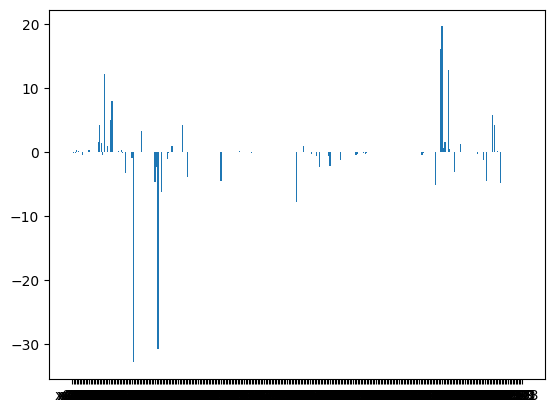

In [42]:
import matplotlib.pyplot as plt

plt.bar(X.columns, ls.coef_)
plt.show()

In [43]:
from sklearn.datasets import load_boston


boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\Bhanu\anaconda3\envs\butterfly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [44]:
from sklearn.model_selection import GridSearchCV

{'alpha': 0.81}


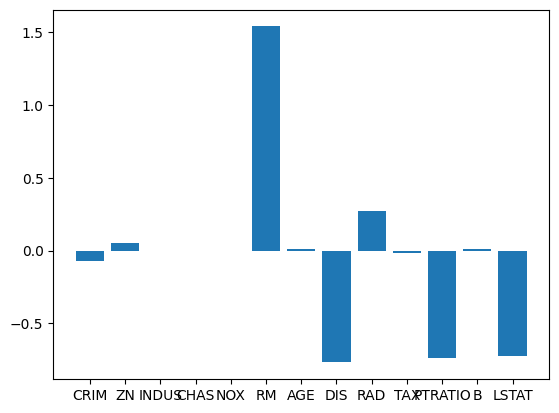

In [45]:
grid_params = {"alpha": np.arange(0.01, 10, 0.10)}
gcv = GridSearchCV(Lasso(), grid_params, cv = 5)
model = gcv.fit(X, y)
print(model.best_params_)
ls = Lasso(alpha = 0.81)
ls.fit(X, y)
plt.bar(boston.feature_names, ls.coef_)
plt.show()

In [46]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu